# k-최근접 이웃 알고리즘
- 지도학습 알고리즘 중 하나
- 괸장히 직관적이고 간단한 알고리즘
- 어떤 데이터가 주어지면 그 주변(이웃)의 데이터를 살펴본 뒤 맘ㄶ은 데이터가 포함되어 있는 범주로 분류하는 방식
- knn의 특징은 훈련이 따로 필요 없다는 것이다. 즉, 다른 모델들은 fit(X_train, y_train)의 코드를 통해 훈련을 시킨다. 다시 말해 훈련데이터를 기반으로 모델을 만들고 테스트를 하는 방식이지만 knn은 훈련데이터를 저장하는 것이 훈련의 전부이다.
- 모델을 별도로 구축하지 않는다는 뜻으로 게으른 모델(Lazy model)이라고 부른다.

# Modul loading

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Data Set loading
- 생선을 분류하기 위해 생선의 길이와 무게를 사용하여 분석한다.
- 35마리의 도미데이터(길이_cm, 무게_g)를 분석


In [73]:
# 도미 데이터(길이와 무게)
## 생선의 길이
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7,
                31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5,
                34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0,
                38.5, 38.5, 39.5, 41.0, 41.0]
## 생선의 무게
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0,
                450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0,
                700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0,
                925.0, 975.0, 950.0]

# 데이터탐색(EDA)

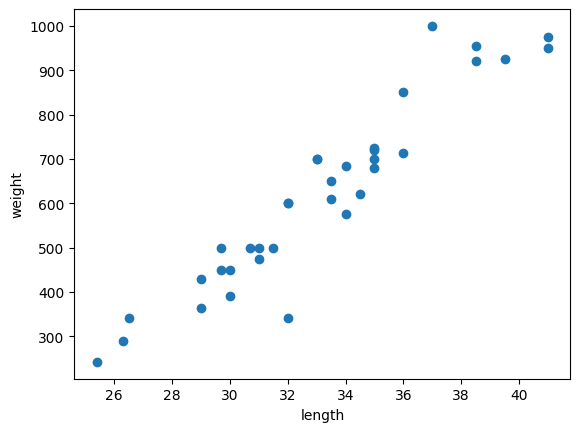

In [74]:
# scatter: 산점도(산포도)
# 길이: x, 무게: y
plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 길이와 무게가 선형관계라는 것을 알 수 있다.
- 길이가 길면 무게가 많이 나간다.

In [75]:
# 14마리의 빙어 데이터(길이와 무게)
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2,
                12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4,
                12.2, 19.7, 19.9]

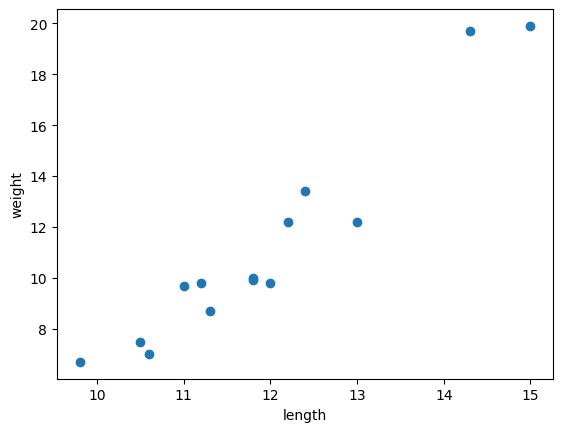

In [76]:
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

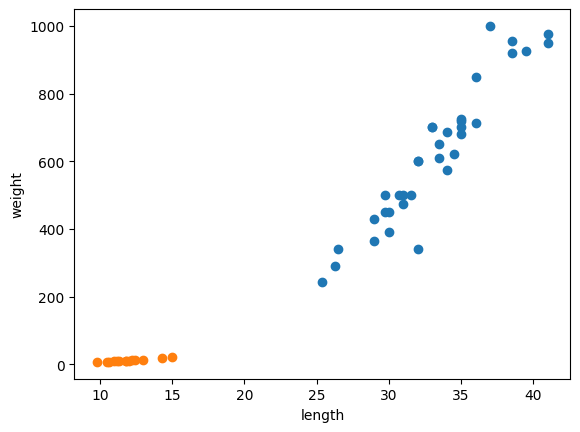

In [77]:
# 도미와 빙어 데이터 분포를 위한 시각화
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [78]:
# 머신러닝 학습을 위한 데이터의 특성을 2차원 형태의 Numpy 배열로 만들어줘야 한다.
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [79]:
length

[25.4,
 26.3,
 26.5,
 29.0,
 29.0,
 29.7,
 29.7,
 30.0,
 30.0,
 30.7,
 31.0,
 31.0,
 31.5,
 32.0,
 32.0,
 32.0,
 33.0,
 33.0,
 33.5,
 33.5,
 34.0,
 34.0,
 34.5,
 35.0,
 35.0,
 35.0,
 35.0,
 36.0,
 36.0,
 37.0,
 38.5,
 38.5,
 39.5,
 41.0,
 41.0,
 9.8,
 10.5,
 10.6,
 11.0,
 11.2,
 11.3,
 11.8,
 11.8,
 12.0,
 12.2,
 12.4,
 13.0,
 14.3,
 15.0]

In [80]:
fish_data = [[l, w] for l, w in zip(length, weight)]
fish_data

[[25.4, 242.0],
 [26.3, 290.0],
 [26.5, 340.0],
 [29.0, 363.0],
 [29.0, 430.0],
 [29.7, 450.0],
 [29.7, 500.0],
 [30.0, 390.0],
 [30.0, 450.0],
 [30.7, 500.0],
 [31.0, 475.0],
 [31.0, 500.0],
 [31.5, 500.0],
 [32.0, 340.0],
 [32.0, 600.0],
 [32.0, 600.0],
 [33.0, 700.0],
 [33.0, 700.0],
 [33.5, 610.0],
 [33.5, 650.0],
 [34.0, 575.0],
 [34.0, 685.0],
 [34.5, 620.0],
 [35.0, 680.0],
 [35.0, 700.0],
 [35.0, 725.0],
 [35.0, 720.0],
 [36.0, 714.0],
 [36.0, 850.0],
 [37.0, 1000.0],
 [38.5, 920.0],
 [38.5, 955.0],
 [39.5, 925.0],
 [41.0, 975.0],
 [41.0, 950.0],
 [9.8, 6.7],
 [10.5, 7.5],
 [10.6, 7.0],
 [11.0, 9.7],
 [11.2, 9.8],
 [11.3, 8.7],
 [11.8, 10.0],
 [11.8, 9.9],
 [12.0, 9.8],
 [12.2, 12.2],
 [12.4, 13.4],
 [13.0, 12.2],
 [14.3, 19.7],
 [15.0, 19.9]]

In [81]:
# 도미(1), 빙어(0)
fish_target = [1] * 35 + [0] * 14
fish_target

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

# Modeling
- knn 알고리즘: 2진 분류 알고리즘

In [82]:
from sklearn.neighbors import KNeighborsClassifier

# 객체 생성, model
knn = KNeighborsClassifier() # p = 2(유클리드안 거리), n_neighbors=5(이웃 수)

# 지도학습(문제, 정답)
model = knn.fit(fish_data, fish_target)

# 평가(정확도 검사)
model.score(fish_data, fish_target)

1.0

# 예측(predict)
- 새로운 데이터를 추가하여 분류하는 작업
- 길이 30, 무게 600인 데이터

In [83]:
model.predict([[30, 600]])  # 도미로 예측

array([1])

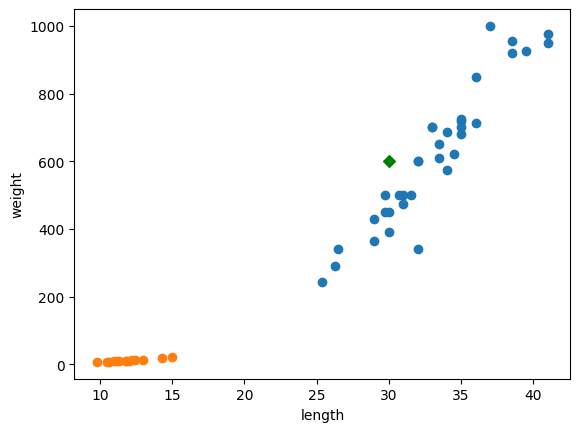

In [84]:
# 도미와 빙어 데이터 분포를 위한 시각화
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
# 예측 데이터
plt.scatter(30, 600, marker='D', color='g')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [85]:
# 데이터 = 특성 = feature
model._fit_X

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


In [86]:
model._y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [87]:
knn49 = KNeighborsClassifier(n_neighbors=49)
knn49.fit(fish_data, fish_target)
knn49.score(fish_data, fish_target)  # k가 크다고 해서 정확도가 높은 게 아님

0.7142857142857143

In [88]:
35/49  # 분류할 데이터/전체 데이터

0.7142857142857143

# 훈련데이터와 테스트 데이터로 분리

In [89]:
print(type(fish_data))
print(type(fish_target))

<class 'list'>
<class 'list'>


In [90]:
fish_data  # 도미와 빙어 데이터를 섞어서 train/test 분리

[[25.4, 242.0],
 [26.3, 290.0],
 [26.5, 340.0],
 [29.0, 363.0],
 [29.0, 430.0],
 [29.7, 450.0],
 [29.7, 500.0],
 [30.0, 390.0],
 [30.0, 450.0],
 [30.7, 500.0],
 [31.0, 475.0],
 [31.0, 500.0],
 [31.5, 500.0],
 [32.0, 340.0],
 [32.0, 600.0],
 [32.0, 600.0],
 [33.0, 700.0],
 [33.0, 700.0],
 [33.5, 610.0],
 [33.5, 650.0],
 [34.0, 575.0],
 [34.0, 685.0],
 [34.5, 620.0],
 [35.0, 680.0],
 [35.0, 700.0],
 [35.0, 725.0],
 [35.0, 720.0],
 [36.0, 714.0],
 [36.0, 850.0],
 [37.0, 1000.0],
 [38.5, 920.0],
 [38.5, 955.0],
 [39.5, 925.0],
 [41.0, 975.0],
 [41.0, 950.0],
 [9.8, 6.7],
 [10.5, 7.5],
 [10.6, 7.0],
 [11.0, 9.7],
 [11.2, 9.8],
 [11.3, 8.7],
 [11.8, 10.0],
 [11.8, 9.9],
 [12.0, 9.8],
 [12.2, 12.2],
 [12.4, 13.4],
 [13.0, 12.2],
 [14.3, 19.7],
 [15.0, 19.9]]

In [91]:
# 49개 = 35:14
# 기존 데이터를 섞지 않고 그대로 작업했을 때
# X_train, X_test, y_train, y_test
train_input = fish_data[:35]
train_target = fish_target[:35]
test_input = fish_data[35:]
test_target = fish_target[35:]

In [92]:
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)  # 도미만 학습시키고 빙어로 테스트하니 정확도가 0이 나옴

0.0

## 무작위로 데이터 섞기

In [93]:
# numpy 라이브러리가 제공하는 shuffle()
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [94]:
input_arr

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


In [95]:
target_arr

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [96]:
input_arr.shape

(49, 2)

In [97]:
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)

In [98]:
index

array([13, 45, 47, 44, 17, 27, 26, 25, 31, 19, 12,  4, 34,  8,  3,  6, 40,
       41, 46, 15,  9, 16, 24, 33, 30,  0, 43, 32,  5, 29, 11, 36,  1, 21,
        2, 37, 35, 23, 39, 10, 22, 18, 48, 20,  7, 42, 14, 28, 38])

In [99]:
# 주의할 점은 input과 target은 같은 위치에 함께 선택되어야 한다.
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

In [100]:
print(input_arr[13], train_input[0])  # 같으면 잘 섞인 것

[ 32. 340.] [ 32. 340.]


## 시각화를 통한 데이터분석
- 도미 데이터와 빙어 데이터가 잘 섞여있는지 확인하는 작업

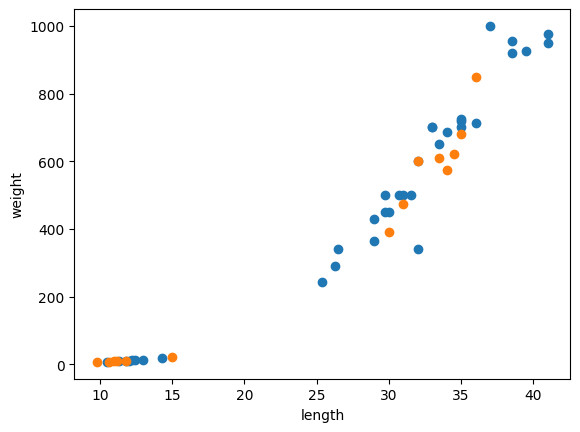

In [101]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [102]:
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [103]:
# 예측
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [104]:
# 실제 결과 값
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

## 이웃 수 k의 최적화 찾기

In [105]:
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)

for n in range(3, 50):
  kn.n_neighbors = n
  score = kn.score(fish_data, fish_target)


  # 100% 정확도에 미치지 못하는 이웃의 개수를 출력
  if score < 1:
    print(n, score)
    break

18 0.9795918367346939


# 데이터 전처리(preprocessing)

In [106]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [107]:
fish_data[:5]

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]

In [108]:
# column_stack()
np.column_stack([[1,2,3], [4,5,6]])

array([[1, 4],
       [2, 5],
       [3, 6]])

**column_stack()**
- 배열을 합치는데 사용되는 함수는 크게 stack류 함수와 concatenate함수가 있다.
- stack류: vstack, hstack, column_stack
- concatenate(): 행과 열을 자유롭게 지정하여 합치기가 가능
- column_stack(): 1차원 벡터를 열 벡터로 인식하여 연결, 2차원부터 hstack과 동일

In [109]:
fish_data = np.column_stack([fish_length, fish_weight])
fish_data[:5]

array([[ 25.4, 242. ],
       [ 26.3, 290. ],
       [ 26.5, 340. ],
       [ 29. , 363. ],
       [ 29. , 430. ]])

In [110]:
a = np.array([1,2,3])
b = np.array([4,5,6])
np.concatenate((a, b), axis = 0)  # 튜플과 리스트 상관없음

array([1, 2, 3, 4, 5, 6])

In [111]:
# np.ones(), np.zeros()
fish_target = np.concatenate([np.ones(35), np.zeros(14)])
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## 훈련 데이터와 테스트 데이터 분리

In [112]:
from sklearn.model_selection import train_test_split
# 전달된 배열 하나의 값을 두 개의 배열로 분할
# 분할 비율: test_size(default = 8:2)

train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, random_state = 42)

In [113]:
print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)

(36, 2) (13, 2)
(36,) (13,)


**sample(행, 데이터포인트)의 편향이 의심된다.**
- 일부 클래스(분류 알고리즘일 때, target을 class)의 개수가 적을 떄 랜덤으로 섞어도 샘플링에 편향이 있을 가능성이 있다

In [114]:
test_target

array([1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [115]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, random_state = 42, stratify = fish_target)

In [116]:
test_target

array([0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

In [117]:
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

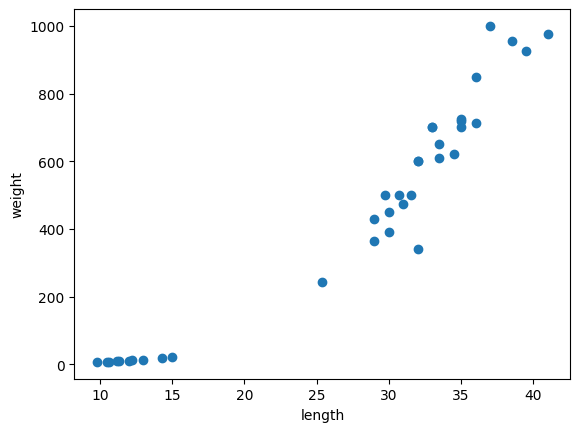

In [118]:
# 학습에 사용된 데이터를 이용한 시각화
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [119]:
# 예측 25cm, 150g 물고기 예측
kn.predict([[25, 150]])  # 그래프 상 도미에 가까워보이지만 모델은 빙어로 예측했다.

array([0.])

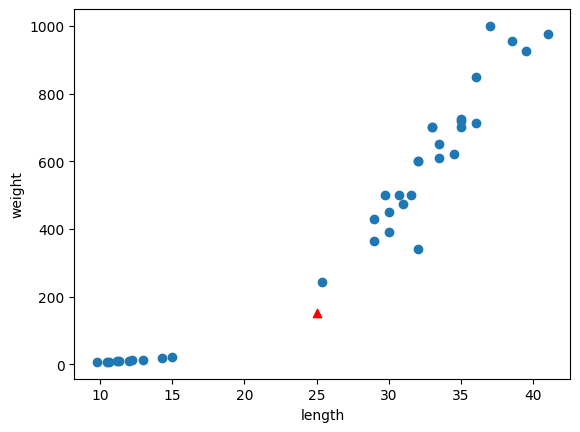

In [120]:
plt.scatter(train_input[:, 0], train_input[:, 1])
# 예측값
plt.scatter(25, 150, marker = '^', color='red')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [121]:
# kneighbors(): 이웃까지의 거리와 이웃의 샘플 인덱스를 반환하는 함수
distances, indexs = kn.kneighbors([[25, 150]])
print(distances)
print(indexs)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]
[[21 33 19 30  1]]


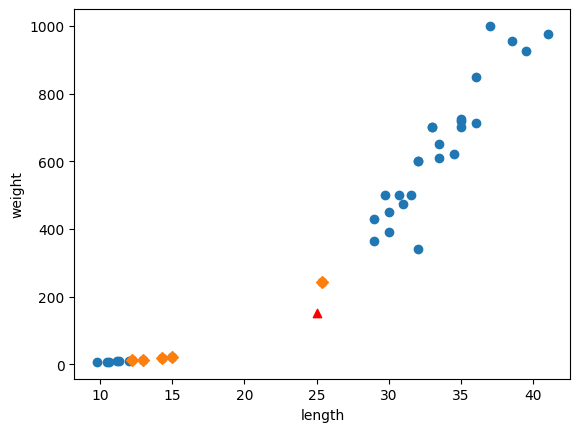

In [122]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker = '^', color='red')
# 이웃 객체
plt.scatter(train_input[indexs, 0], train_input[indexs, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [123]:
train_target[indexs]

array([[1., 0., 0., 0., 0.]])

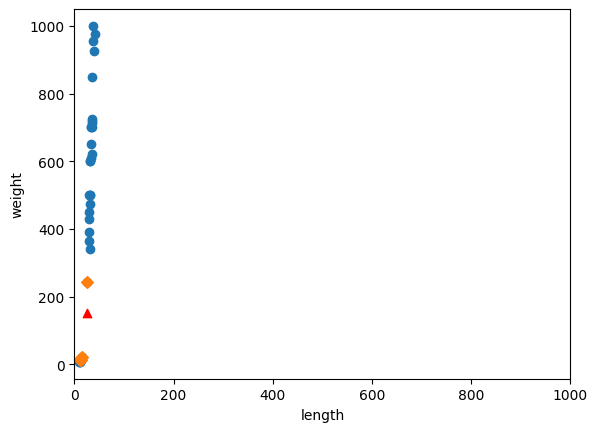

In [124]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker = '^', color='red')
# 이웃 객체
plt.scatter(train_input[indexs, 0], train_input[indexs, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.xlim(0, 1000)
plt.show()

## 피처 스케일링
- 두 특성의 스케일(scale)이 다를 때, 데이터를 표현하는 기준이 다르면 알고리즘이 올바르게 예측할 수 없다.
- 최소-최대 정규화(Min-Max Normalization)\
  Xnew = X-min(X) / max(X) - min(X)
- Z-점수(Z-value standardization)\
  Xnew = X-mean(X) / std(X)

In [125]:
mean = np.mean(train_input, axis=0) # 열방향 계산
std = np.std(train_input, axis=0)

In [126]:
# 스케일링된 피처값
train_scaled = (train_input - mean) / std

In [127]:
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [128]:
train_scaled[:3]

array([[ 0.24070039,  0.14198246],
       [-1.51237757, -1.36683783],
       [ 0.5712808 ,  0.76060496]])

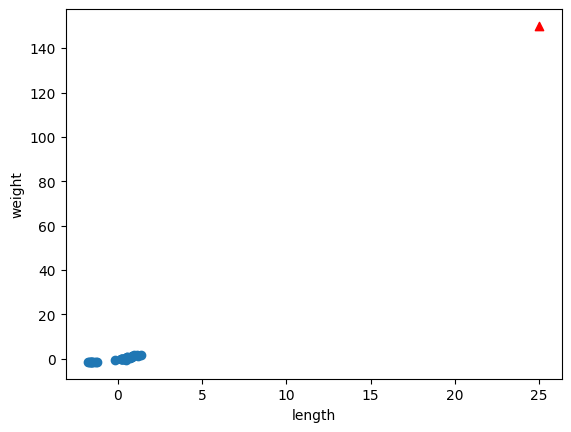

In [129]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(25, 150, marker = '^', color='red')

plt.xlabel('length')
plt.ylabel('weight')

plt.show()

In [130]:
# 예측할 샘플도 표준화 필요
new = ([25, 150] - mean) / std

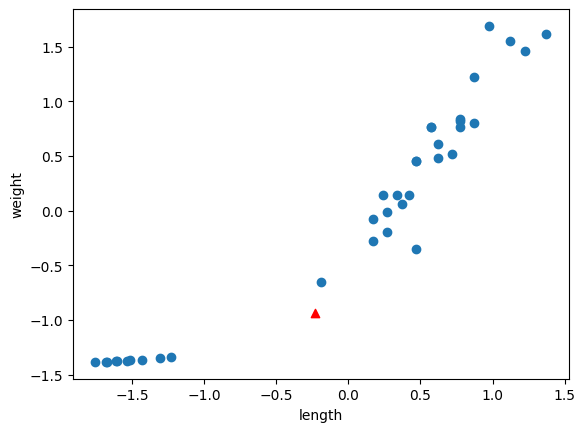

In [131]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker = '^', color='red')

plt.xlabel('length')
plt.ylabel('weight')

plt.show()

In [132]:
# 평가 전 test 데이터도 표준화 필요
test_scaled = (test_input - mean) / std

In [133]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [134]:
kn.score(test_scaled, test_target)

1.0

In [135]:
kn.predict([new]) # 표준화 후 도미로 예측

array([1.])

In [136]:
# 예측에 사용된 이웃과의 거리와 인덱스 가져오기
distances, indexs = kn.kneighbors([new])

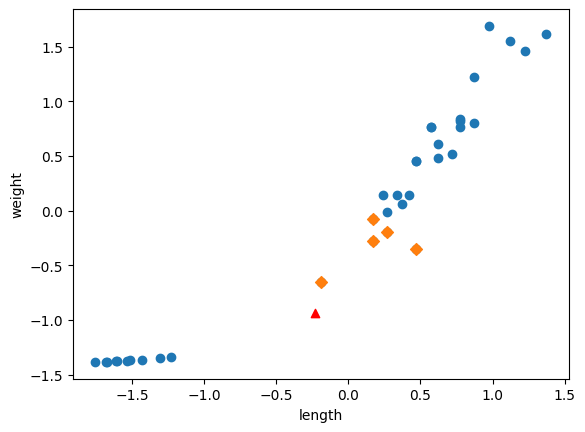

In [137]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker = '^', color='red')
# 이웃 객체
plt.scatter(train_scaled[indexs, 0], train_scaled[indexs, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
# 이웃이 전부 도미이다.

# 확인 학습
- kaggle 데이터 Orange vs GrapeFruit
- 데이터셋: www.kaggle.com/joshmcadams/oranges-vs-grapefruit

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [138]:
df = pd.read_csv('citrus.csv')
df.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [143]:
df['name'].value_counts()

orange        5000
grapefruit    5000
Name: name, dtype: int64

## 1. 리스트로 모델링

In [144]:
orange_diameter = df[df['name'] == 'orange']['diameter'].tolist()
orange_weight = df[df['name'] == 'orange']['weight'].tolist()
grapefruit_diameter = df[df['name'] == 'grapefruit']['diameter'].tolist()
grapefruit_weight = df[df['name'] == 'grapefruit']['weight'].tolist()

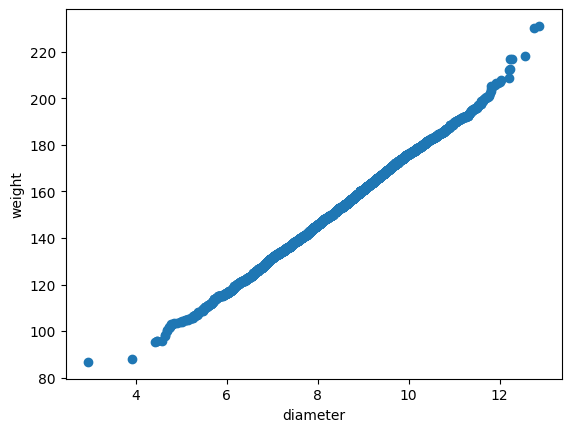

In [147]:
# 오렌지 직경과 무게
plt.scatter(orange_diameter, orange_weight)
plt.xlabel('diameter')
plt.ylabel('weight')
plt.show()

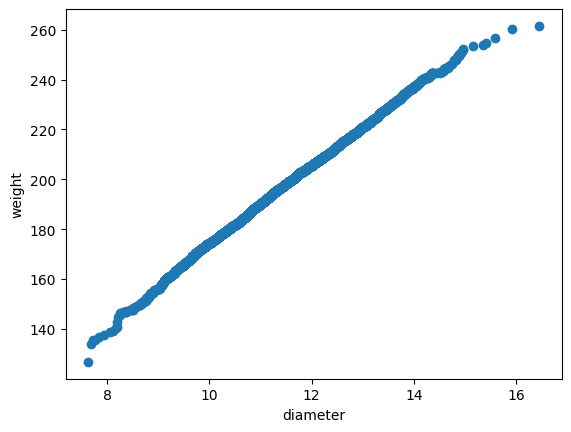

In [148]:
# 포도 직경과 무게
plt.scatter(grapefruit_diameter, grapefruit_weight)
plt.xlabel('diameter')
plt.ylabel('weight')
plt.show()

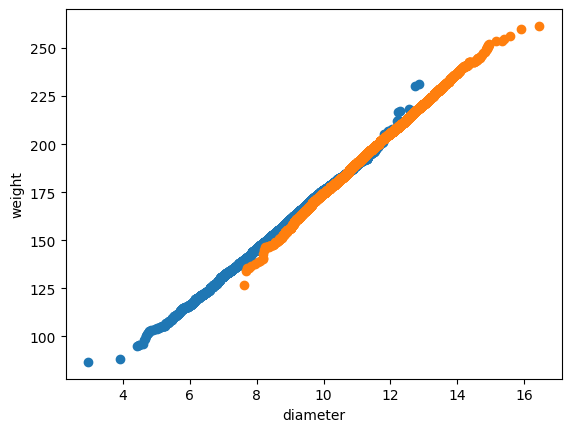

In [149]:
# 오렌지와 포도의 데이터 분포를 위한 시각화
plt.scatter(orange_diameter, orange_weight)
plt.scatter(grapefruit_diameter, grapefruit_weight)
plt.xlabel('diameter')
plt.ylabel('weight')
plt.show()
# 오렌지: 파란색, 포도: 주황색

## 2. scikit-learn


### 데이터탐색

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [151]:
df.describe()

,diameter,weight,red,green,blue
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.975685,175.050792,153.847800,76.010600,11.363200
std,1.947844,29.212119,10.432954,11.708433,9.061275
min,2.960000,86.760000,115.000000,31.000000,2.000000
25%,8.460000,152.220000,147.000000,68.000000,2.000000
50%,9.980000,174.985000,154.000000,76.000000,10.000000
75%,11.480000,197.722500,161.000000,84.000000,17.000000
max,16.450000,261.510000,192.000000,116.000000,56.000000


In [152]:
# feature 결측값 확인
df.isna().sum()

name        0
diameter    0
weight      0
red         0
green       0
blue        0
dtype: int64